In [3]:
import xarray as xr
from cartopy import crs as ccrs
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 13
})

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


perturbed3 = xr.open_mfdataset("/pscratch/sd/a/amahesh/hens/demo_bred_3step/ensemble_out_0000*_2020-06-18-00-00-00.nc",
                     group='global', concat_dim='ensemble', combine='nested')

perturbed3 = perturbed3.isel(ensemble=2) - perturbed3.isel(ensemble=0)


perturbed3.isel(time=slice(0,1)).to_netcdf("/global/cfs/cdirs/m4416/www/hens/part_i_figures/figure_5/perturbation_sample.nc")


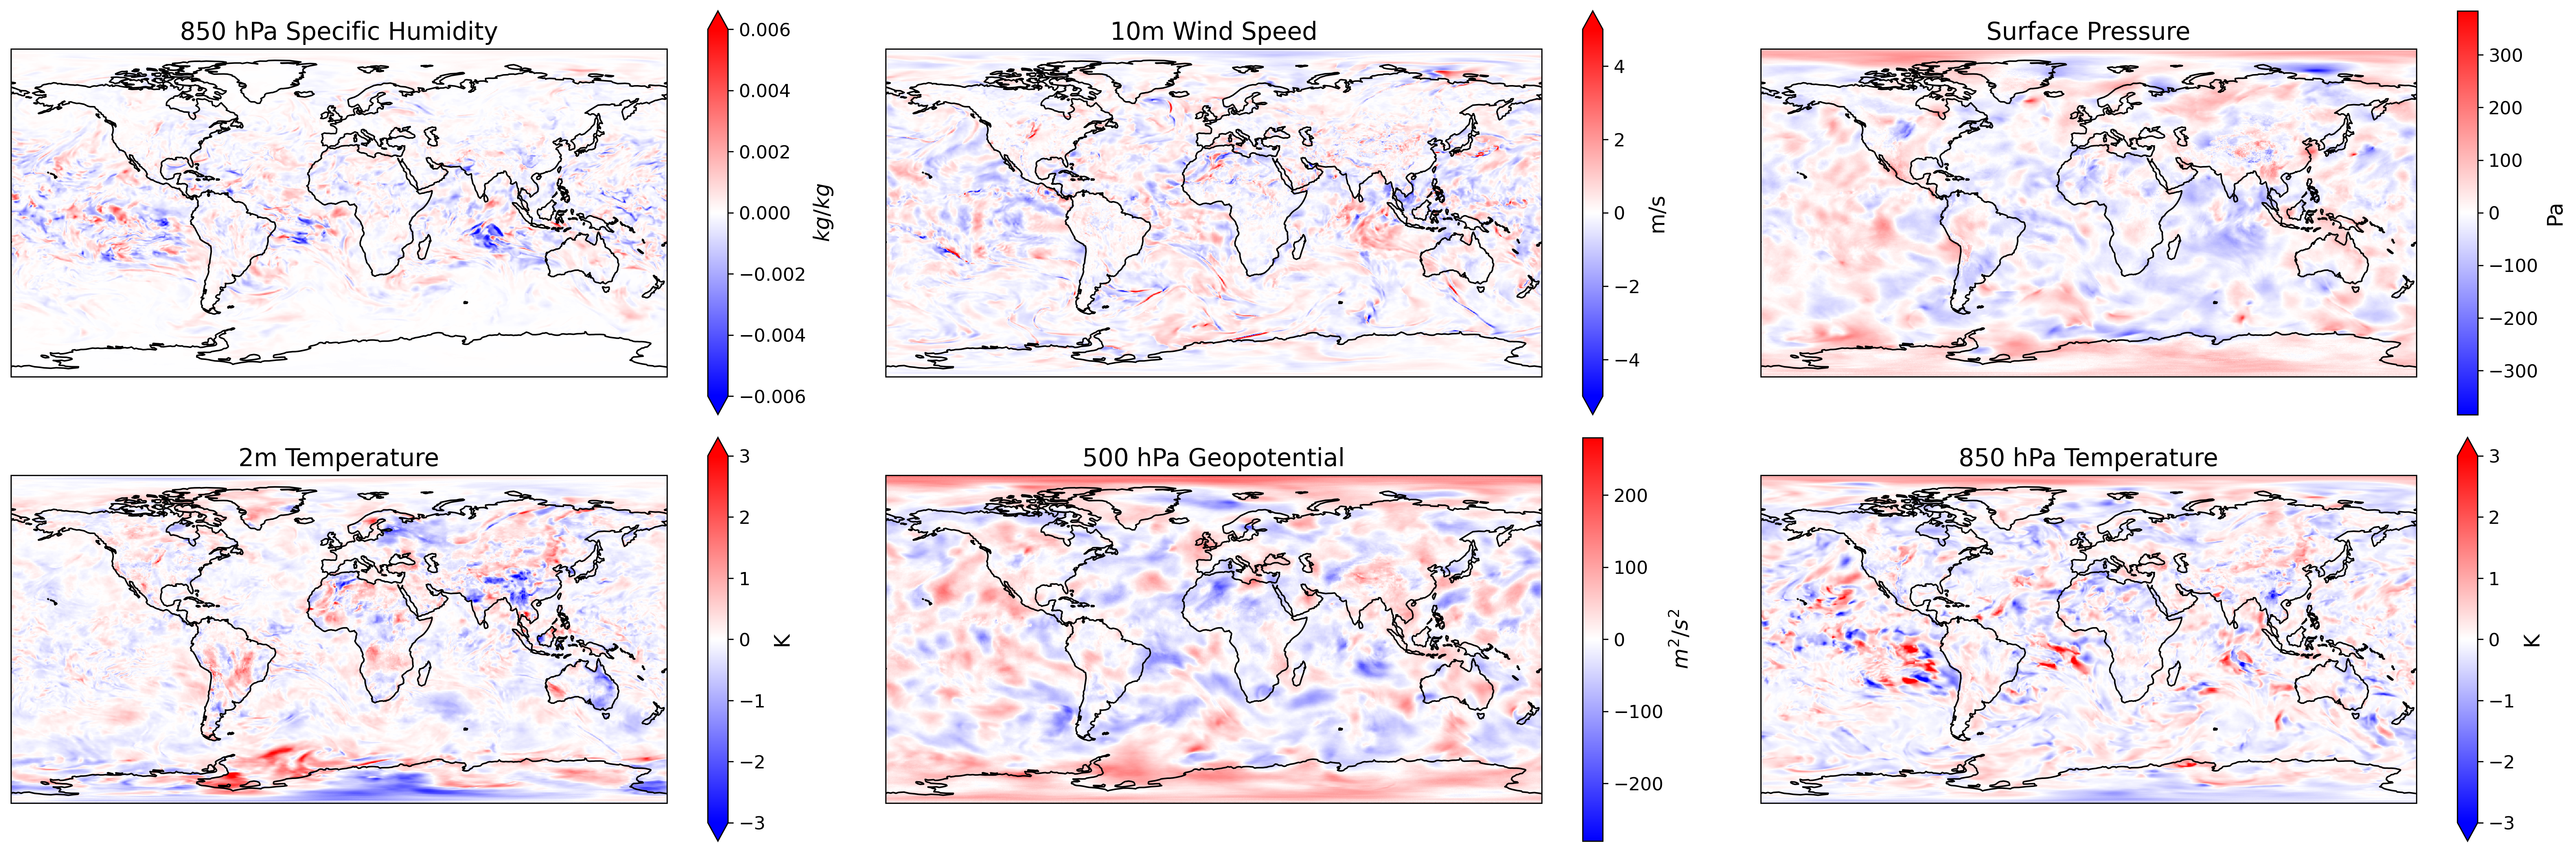

In [5]:
# datasets = [perturbed0, perturbed1, perturbed2, perturbed3]
# dataset_names = ['Step 0', 'Step 1', 'Step 2', 'Step 3']
variables = ['q850', 'wind_speed10m', 'sp', 't2m', 'z500', 't850']

# Define colorbar limits for each variable
colorbar_limits = {
    'tcwv': (-10, 10),  # Example limits, adjust these as needed
    't2m': (-3, 3),
    'q850': (-0.006, 0.006),
    'z500': (-280, 280),
    'sp' : (None, None),
    'u850' : (-10, 10),
    'v850' : (-10, 10),
    't850' : (-3, 3),
    'ivt' : (-100,100),
    'u10m' : (-5, 5),
    'q1000' : (-0.004, 0.004),
        't500' : (None, None),
        'z300' : (None, None),
     'wind_speed10m' : (-5, 5)

}

units = {
    't2m': 'K',
    'q850': '$kg/kg$',
    'z500': '$m^2/s^2$',
    'sp' : 'Pa',
    't850' : 'K',
     'wind_speed10m' : 'm/s'

}

titles = {
    't2m': '2m Temperature',
    'q850': '850 hPa Specific Humidity',
    'z500': '500 hPa Geopotential',
    'sp' : 'Surface Pressure',
    't850' : '850 hPa Temperature',
     'wind_speed10m' : '10m Wind Speed'

}

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 8), dpi=300, subplot_kw={'projection': ccrs.PlateCarree()})

# Plot each variable for each dataset
for i, var in enumerate(variables):
    ax = axes.flatten()[i]
    data = perturbed3[var].isel(time=0)

    im = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='bwr', add_colorbar=True, vmin=colorbar_limits[var][0], vmax=colorbar_limits[var][1],
                  cbar_kwargs={'label' : units[variables[i]]})

    ax.coastlines()
    ax.set_title(titles[variables[i]])

# Adjust layout and add a colorbar to the end of each row
fig.tight_layout()
plt.savefig("bred_vector_demo.png")
plt.show()
